<h1 style="text-align: center"> Plant disease classification </h1>

<!--<img src="image_1.jpg" style="width:200px,height:200px">
#<p style="text-align: center"> Source: image by <a href="https://www.freepik.com/author/wirestock">wirestock</a> on <a #href="https://www.freepik.com/"> Freepik </a>-->
<h2> 📘 Introduction </h2>

This dataset aims to predict plant diseases by analyzing environmental and climate-related variables. By using measurable conditions (temperature, humidity, rainfall, soil pH), model can be created to predict disease occurrence in plants. It is a valuable resource for agricultural forecasting and decision support systems.

<h2> 📂 Dataset Info </h2>
<br/>
<li> Source: Kaggle — Plant Disease Classification by Egon Rubekin </li>
<li> Link: <a href='https://www.kaggle.com/datasets/turakut/plant-disease-classification'> https://www.kaggle.com/datasets/turakut/plant-disease-classification </a> </li>
<li> Type: Tabular (.csv file) </li>
<li> Rows: Each entry represents a recorded environmental conditions with the corresponding plant disease status </li>
<li> Features: Temperature, humidity, rainfall, soil pH  </li>
<li> Labels: Indicates whether disease was detected (binary or multi-class) </li>

<h3> 📊 Understanding the Data </h3>

In this section, needed libraries and dataset are imported, dataframe is checked and along with data types. We check if there are any null values. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("plant_disease_dataset.csv")

In [3]:
# display first 5 rows

df.head()

,temperature,humidity,rainfall,soil_pH,disease_present
0,27.483571,33.215053,0.572758,4.975875,1
1,24.308678,36.945005,42.522346,8.165266,0
2,28.238443,34.026189,16.095303,6.316734,1
3,32.615149,41.104180,20.311015,6.164949,0
4,23.829233,51.971785,11.851323,8.482468,0


In [4]:
# check types of data in dataset

df.dtypes

temperature        float64
humidity           float64
rainfall           float64
soil_pH            float64
disease_present      int64
dtype: object

In [5]:
# check for any null values

df.isnull().values.any()

False

<h3>🧾 Data Summary and Descriptive Statistics </h3>

In this section, statistical values are shown and visualized using plots, we check data distribution for each feature. By creating correlation matrix we can check correlations between variables. KDE plots will show us distribution of variable split by label.

In [6]:
# get statistical information about data

df.describe()

,temperature,humidity,rainfall,soil_pH,disease_present
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.612191,62.119300,9.807522,6.245855,0.241000
std,5.813841,22.679977,9.852130,1.302465,0.427712
min,5.387999,6.244209,0.000055,4.000075,0.000000
25%,21.815610,40.772925,2.812822,5.122970,0.000000
50%,25.293238,72.211752,6.864898,6.232188,0.000000
75%,28.916048,81.032999,13.442871,7.386377,0.000000
max,56.686495,102.395421,84.654161,8.499875,1.000000


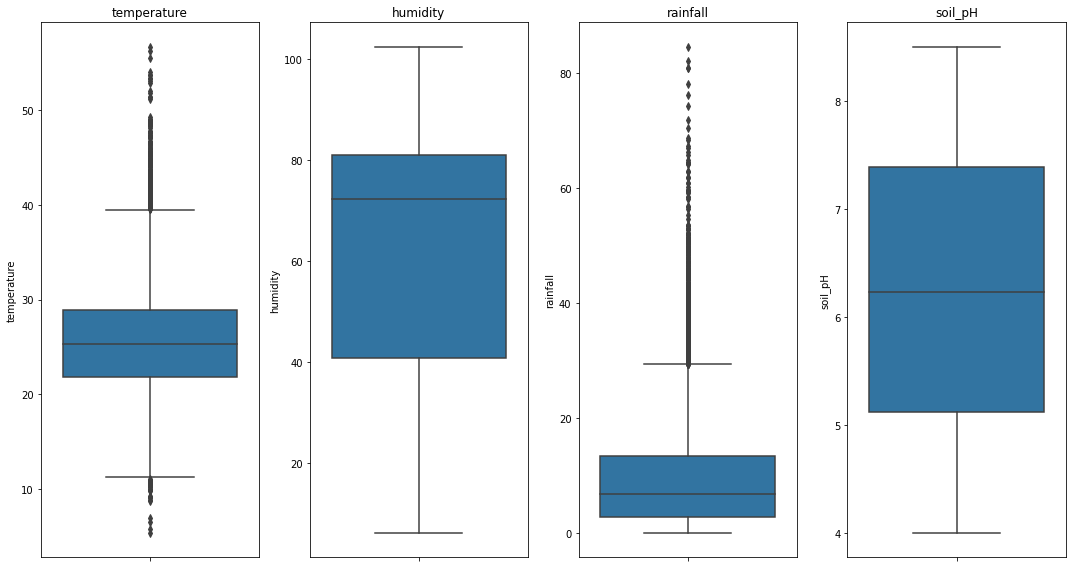

In [7]:
#plot boxplots to visualize summary statistic

columns = [col for col in df.columns if col != 'disease_present']
plt.figure(figsize=(15, 8))

for i, col in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

From created boxplots we can conclude following:
 <ol> 1. temperature
    <ul> 
        <li> median is around 25, at the center of box, indicating symmetrical distribution </li>
        <li> many outliers on both ends, indicating big number of extremes
    </ul>
</ol>
 <ol> 2. humidity
    <ul> 
        <li> median is bigger than 70, toward the upper quartile </li>
        <li> no visible outliers
    </ul>
</ol>
 <ol> 3. rainfall
    <ul> 
        <li> median is around 10, toward the lower quartile </li>
        <li> many outliers on upper end, indicating big number of extremes
    </ul>
</ol>
 <ol> 4. soil_pH
    <ul> 
        <li> median is at the center of box, indicating symmetrical distribution </li>
        <li> no visible outliers
    </ul>
</ol>

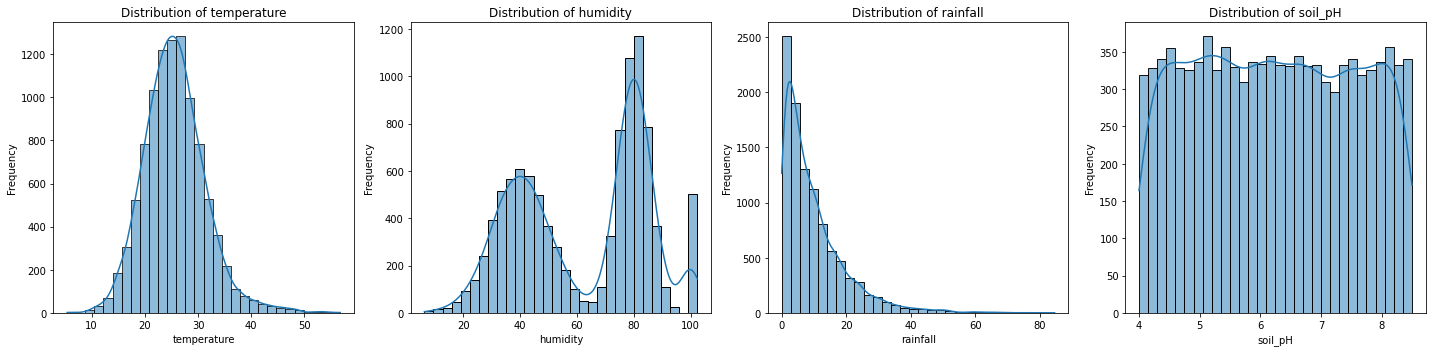

In [8]:
# plot histograms to check data distribution

plt.figure(figsize=(5 * len(columns), 5))

for i, col in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

From distribution charts we can conclude following:

<li> temperature  - normal distribution, median more to the left </li>
<li> humidity - two peaks </li>
<li> rainfall - extreme values, exponential drop </li>
<li> soil_pH - uniform distribution, values are spread evenly across a range </li>

<AxesSubplot:>

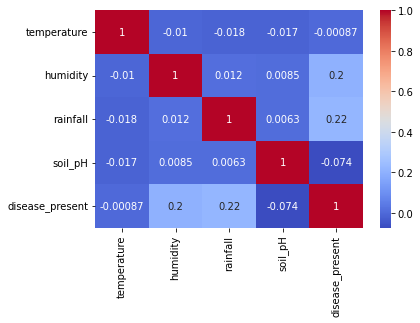

In [9]:
# plot correlation matrix to check relationships (correlations) between data

df.corr()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

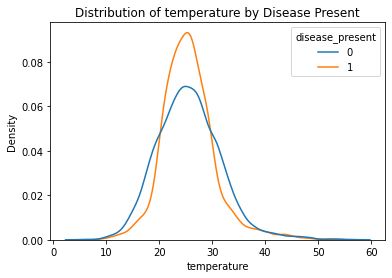

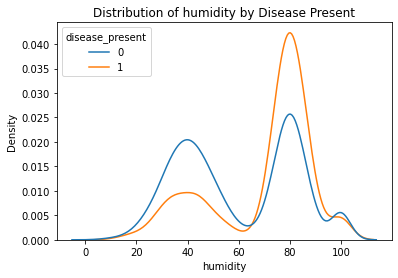

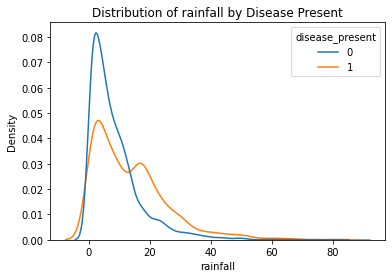

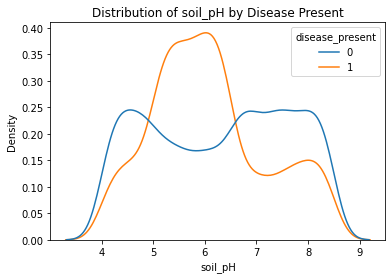

In [10]:
# plot KDE plots to check distribution of variable split by label

columns = [col for col in df.columns if col != 'disease_present']

for feature in columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=feature, hue='disease_present', common_norm=False)
    plt.title(f'Distribution of {feature} by Disease Present')
    plt.show()


From KDE plots, we can conclude:
<li> temperature <ul> <li> moderate separation between disease present and not present, with orange curve being more narrower and with less spread then blue curve </li> <li> curves are overlapping </li> <li> visible shift in distribution </li> </ul> </li> 
<li> humidity <ul> <li> orange peak is sharper and peaks later, suggesting that plant disease occurs more likely with higher humidity <li> blue line is more spread out, indicating more variability in plants without disease </li> </ul> </li>
<li> rainfall <ul> <li> orange curve peaks later and is more spread out. </li> <li> blue peak is very sharp and starts early, indicating that plant disease occurs more likely with lower rainfall values </li> </ul></li>
<li> soil_pH <ul> <li> orange curve peaks higher than blue one </li> <li> there is no strong separation between two classes</li> <li> curves are overlapping </li> </ul> </li>

<h3>🤖 Modeling and predictions </h3>

In this section, models will be created using few algorithms to see which one gives best results. Metrics will be used to evaluate model results. Finally, model will be checked on brand new data to see how well does categorize diseased plants.

In [11]:
# scale features to prevent bias

feature_cols = ['temperature', 'humidity', 'rainfall', 'soil_pH']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols])

In [12]:
X_scaled

array([[ 0.32189968, -1.27450275, -0.93738372, -0.97510765],
       [-0.22421968, -1.11003436,  3.32074982,  1.47374945],
       [ 0.45174666, -1.23873652,  0.63824726,  0.05442193],
       ...,
       [-0.7119186 ,  0.87184652,  0.36738525,  0.65703976],
       [ 0.32108385,  1.16621246, -0.0089187 ,  1.14155865],
       [ 0.44890839,  0.43128749, -0.49952425, -1.42991329]])

In [13]:
# create training and testing datasets


X = X_scaled  # 
y = df['disease_present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h2> Logistic Regression </h2>

In [14]:
# create logistic regression model

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1485   33]
 [ 441   41]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86      1518
           1       0.55      0.09      0.15       482

    accuracy                           0.76      2000
   macro avg       0.66      0.53      0.50      2000
weighted avg       0.72      0.76      0.69      2000



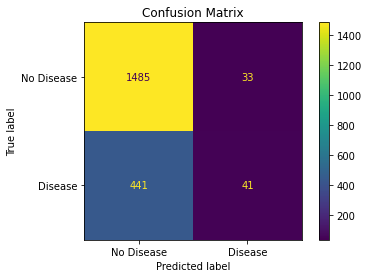

In [15]:
# show confusion matrix for logistic regression model result

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.show()


From confusion matrix we can conclude following:
<li> 1485 true negatives - 1485 healthy cases correctly predicted as healthy </li>
<li> 41 true positives - 41 diseased cases correctly predicted as diseased </li>
<li> 33 false positive - 33 healthy cases mistakenly predicted as diseased. </li>
<li> 441 false negatives - 441 wrongly predicted as healthy </li>

class  | precision  |  recall | f1-score  | support

     0       0.77    0.98      0.86      1518
     1       0.55    0.09      0.15       482


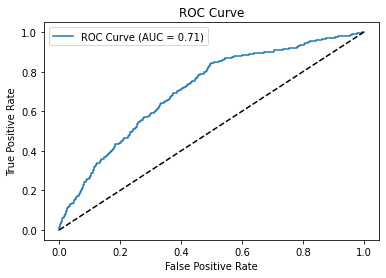

In [16]:
# check ROC curve

y_probs = model.predict_proba(X_test)[:,1]  # Probability of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


ROC curve indicates that model is good, but it could be better. Although curve is above diagonal line, AUC of 0.71 indicates that model could be refined for better results or new classification algorithm should be used. 

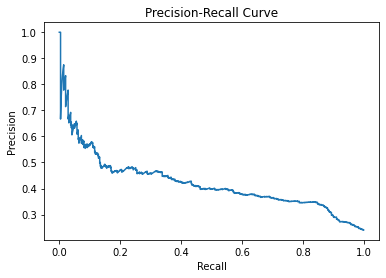

In [17]:
#check Precision-Recall Curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


Precision-Recall Curve indicates that precision drops as recall is increasing, with sharp fall at the beginning.

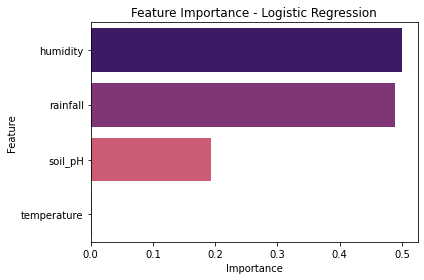

In [18]:
# check Feature Importance chart

feature_names = df.columns.drop('disease_present')
coefficients = model.coef_[0]  

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients) 
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='magma')
plt.title("Feature Importance - Logistic Regression")
plt.tight_layout()
plt.show()

humidity and rainfall are listed as most important feature is Logistic Regression algorithm, soil_pH is at third place and temperature, surprisingly, have no importance at this model at all.

<h2> Random Forest classifier </h2>

In [19]:
# create random forest model

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1444   74]
 [ 207  275]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1518
           1       0.79      0.57      0.66       482

    accuracy                           0.86      2000
   macro avg       0.83      0.76      0.79      2000
weighted avg       0.85      0.86      0.85      2000



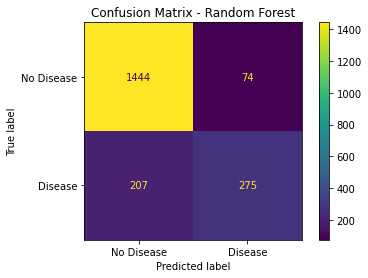

In [20]:
# check confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["No Disease", "Disease"])
plt.title("Confusion Matrix - Random Forest")
plt.show()

<li> 1444 healthy cases correctly predicted as healthy </li>
<li> 275 diseased cases correctly predicted as diseased </li>
<li> 74 healthy cases mistakenly predicted as diseased </li>
<li> 207 diseased cases missed — wrongly predicted as healthy </li>

 class |  precision  |  recall | f1-score  | support

     0       0.87      0.95      0.91      1518
     1       0.79      0.57      0.66       482
          

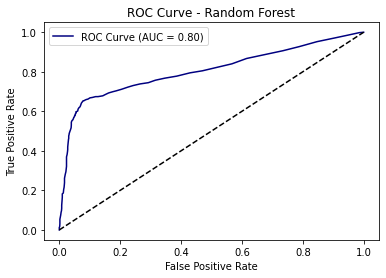

In [21]:
# check ROC curve

fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='navy')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


ROC curve shows improvement compared to ROC curve for logistic regression with AUC being 0.80. 

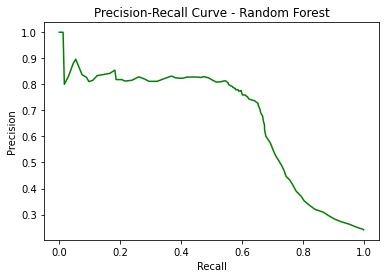

In [22]:
# check precision recall curve

precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Random Forest")
plt.show()


Precision-Recall Curve indicates that precision drops as recall is increasing, with slight stagnation at the center and significant drop after 0.7

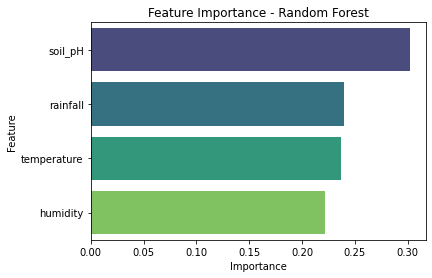

In [23]:
# check feature importance

feature_names = df.columns.drop('disease_present') 
importances = model.feature_importances_

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.show()


soil_pH is listed as most important feature is Random Forest algorithm, with rainfall being at second place, temperature at third and humidity at last place, although percentage of importance is in range 23%-30%.

<h2>XGB Classifier </h2>

In [24]:
# create XGB model

neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
ratio = neg_count / pos_count

model = XGBClassifier(
    max_depth=5,
    learning_rate=0.05,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=ratio,  
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]  

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_probs))


[[1343  175]
 [ 161  321]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1518
           1       0.65      0.67      0.66       482

    accuracy                           0.83      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.83      0.83      0.83      2000

AUC: 0.8036179948501796


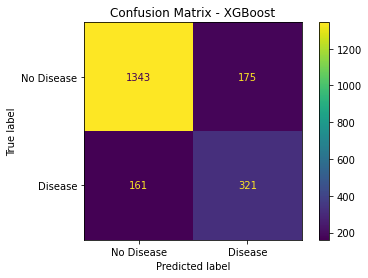

In [25]:
# check confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["No Disease", "Disease"])
plt.title("Confusion Matrix - XGBoost")
plt.show()

<li> 1343 healthy cases correctly predicted as healthy </li>
<li> 321 diseased cases correctly predicted as diseased </li>
<li> 175 healthy cases mistakenly predicted as diseased </li>
<li> 161 diseased cases missed — wrongly predicted as healthy </li>

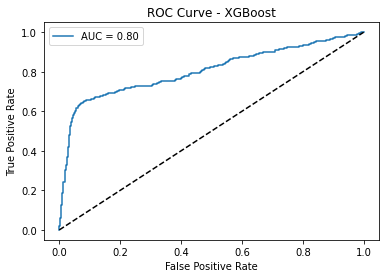

In [26]:
# check ROC curve

fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


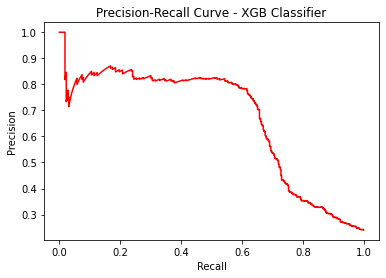

In [27]:
# check precision recall

precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='red')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGB Classifier")
plt.show()

Precision-Recall curve is simillar to one generated by Random Forest algorithm, with slight drop at start, stagnation at middle and drop at around 0.7

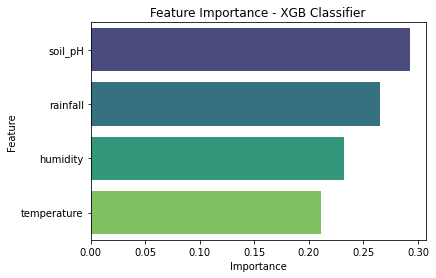

In [28]:
# check feature importance chart

feature_names = df.columns.drop('disease_present') 
importances = model.feature_importances_

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title("Feature Importance - XGB Classifier")
plt.show()


soil_pH is listed as most important feature is XGB classification algorithm, with rainfall being at second place, humidity at third and temperature at last place, although percentage of importance is in range 20%-30%.

<h1> Testing algorithm with synthetic data </h1>

As seen, best AUC curve have Random Forest and XGB Classifier algorithm. Now, we will create synthetic data and test them vith XGB classifier to see results.

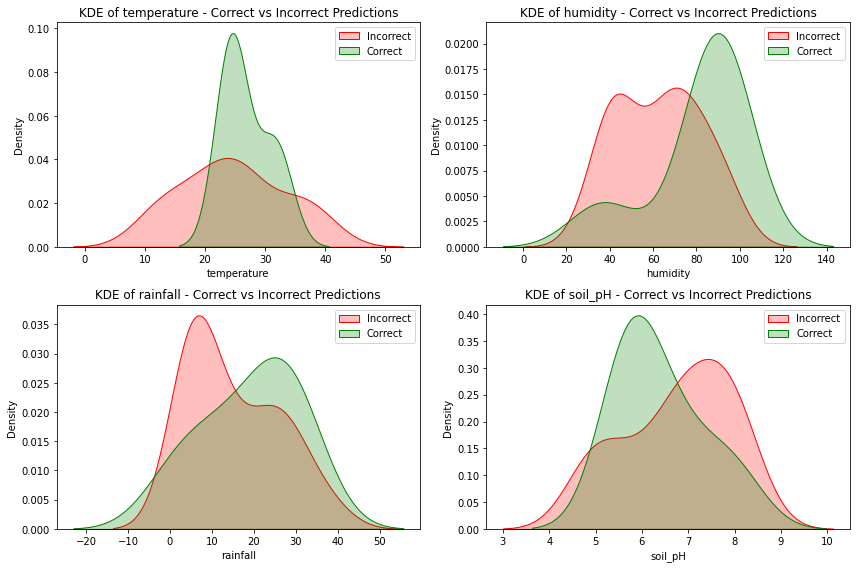


✅ Accuracy on synthetic data: 0.80

📋 Classification Report:
              precision    recall  f1-score   support

  No Disease       1.00      0.77      0.87        26
     Disease       0.40      1.00      0.57         4

    accuracy                           0.80        30
   macro avg       0.70      0.88      0.72        30
weighted avg       0.92      0.80      0.83        30



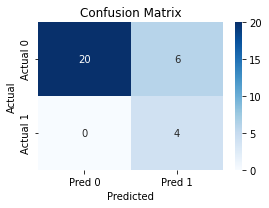

In [29]:

# 1. Create synthetic data
np.random.seed(42)

synthetic_df = pd.DataFrame({
    'temperature': [21.83, 34.36, 23.76, 20.40, 38.20, 39.38, 23.54, 35.62, 11.85, 25.10,
                    26.31, 37.16, 27.03, 27.40, 32.57, 23.70, 11.66, 21.23, 18.95, 33.99,
                    25.37, 13.45, 25.01, 15.69, 26.78, 12.41, 26.92, 23.78, 18.61, 30.73],
    'humidity': [95.50, 43.42, 87.98, 72.22, 37.61, 42.30, 43.97, 31.54, 81.21, 89.02,
                 73.45, 39.97, 67.51, 93.51, 96.85, 36.90, 79.89, 61.20, 65.07, 61.60,
                 89.79, 45.19, 89.88, 58.20, 41.42, 86.00, 44.43, 71.65, 72.87, 86.17],
    'rainfall': [6.54, 26.88, 18.26, 23.22, 6.59, 5.87, 4.23, 25.79, 9.45, 4.18,
                 17.78, 30.12, 38.29, 3.94, 25.46, 27.62, 3.61, 16.84, 32.79, 16.88,
                 1.20, 5.47, 9.93, 11.80, 23.57, 8.52, 4.97, 8.14, 27.14, 31.41],
    'soil_pH': [6.51, 6.98, 7.99, 6.77, 4.87, 7.86, 4.90, 8.32, 7.65, 6.91,
                7.88, 8.10, 5.81, 4.81, 5.84, 5.68, 7.78, 7.17, 7.37, 6.43,
                6.27, 5.85, 5.60, 7.93, 5.16, 8.00, 5.27, 6.71, 7.19, 7.03],
    'disease_present': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
                        1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
                        0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
})

# 2. Scale the features
X_synthetic = scaler.transform(synthetic_df.drop(columns='disease_present'))

# 3. Predict using the trained model
y_pred = model.predict(X_synthetic)
y_prob = model.predict_proba(X_synthetic)[:, 1]

# 4. Add predictions to the DataFrame
synthetic_df['model_pred'] = y_pred
synthetic_df['model_prob'] = y_prob
synthetic_df['correct'] = (synthetic_df['disease_present'] == synthetic_df['model_pred']).astype(int)

# 5. KDE plots: correct vs incorrect predictions
features = ['temperature', 'humidity', 'rainfall', 'soil_pH']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.kdeplot(
        data=synthetic_df,
        x=feature,
        hue='correct',
        palette={0: 'green', 1: 'red'},
        ax=axes[i],
        fill=True,
        common_norm=False
    )
    axes[i].set_title(f"KDE of {feature} - Correct vs Incorrect Predictions")
    axes[i].legend(labels=['Incorrect', 'Correct'])

plt.tight_layout()
plt.show()

# 6. Summary of model performance
accuracy = accuracy_score(synthetic_df['disease_present'], synthetic_df['model_pred'])
print(f"\n✅ Accuracy on synthetic data: {accuracy:.2f}")

print("\n📋 Classification Report:")
print(classification_report(synthetic_df['disease_present'], synthetic_df['model_pred'], target_names=['No Disease', 'Disease']))

# 7. Confusion matrix plot
cm = confusion_matrix(synthetic_df['disease_present'], synthetic_df['model_pred'])

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


As seen, model has accuracy of 80% on test data, correctly predicting 20 healthy cases as healthy and 4 diseased cases as diseased. Model also incorrectly predicted 6 healthy cases as diseased.